## Skill Demand & Gap Analysis

This section analyzes job market skill demand and compares it with
the user's current skill set to identify learning gaps.


In [5]:
import sys
import os

sys.path.append(os.path.abspath(".."))


In [1]:
import pandas as pd

jobs = pd.read_csv("../data/job_descriptions.csv")
skills = pd.read_csv("../data/skill_dictionary.csv")

print(jobs.head())
print(skills.head())

   job_id         job_title                                        description
0       1      Data Analyst  Strong SQL, Python, Power BI, data visualizati...
1       2    Data Scientist  Python, machine learning, pandas, numpy, SQL, ...
2       3  Business Analyst  Excel, SQL, Power BI, communication, data anal...
              skill
0            python
1               sql
2  machine learning
3          power bi
4             excel


In [2]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z ]', '', text)
    return text

jobs["clean_description"] = jobs["description"].apply(clean_text)
jobs[["job_title", "clean_description"]]

,job_title,clean_description
0,Data Analyst,strong sql python power bi data visualization ...
1,Data Scientist,python machine learning pandas numpy sql deep ...
2,Business Analyst,excel sql power bi communication data analysis


In [3]:
skill_list = skills["skill"].tolist()

def extract_skills(text):
    found_skills = []
    for skill in skill_list:
        if skill in text:
            found_skills.append(skill)
    return found_skills

jobs["extracted_skills"] = jobs["clean_description"].apply(extract_skills)
jobs[["job_title", "extracted_skills"]]


,job_title,extracted_skills
0,Data Analyst,"[python, sql, power bi, statistics, data visua..."
1,Data Scientist,"[python, sql, machine learning, deep learning,..."
2,Business Analyst,"[sql, power bi, excel]"


In [6]:
from utils.skill_analysis import get_skill_demand, get_missing_skills


In [7]:
skill_demand = get_skill_demand(jobs["extracted_skills"])

skill_demand


Counter({'sql': 3,
         'python': 2,
         'power bi': 2,
         'statistics': 1,
         'data visualization': 1,
         'machine learning': 1,
         'deep learning': 1,
         'pandas': 1,
         'numpy': 1,
         'excel': 1})

In [8]:
import pandas as pd

demand_df = pd.DataFrame(
    skill_demand.items(),
    columns=["Skill", "Demand"]
).sort_values(by="Demand", ascending=False)

demand_df


,Skill,Demand
1,sql,3
0,python,2
2,power bi,2
3,statistics,1
4,data visualization,1
5,machine learning,1
6,deep learning,1
7,pandas,1
8,numpy,1
9,excel,1


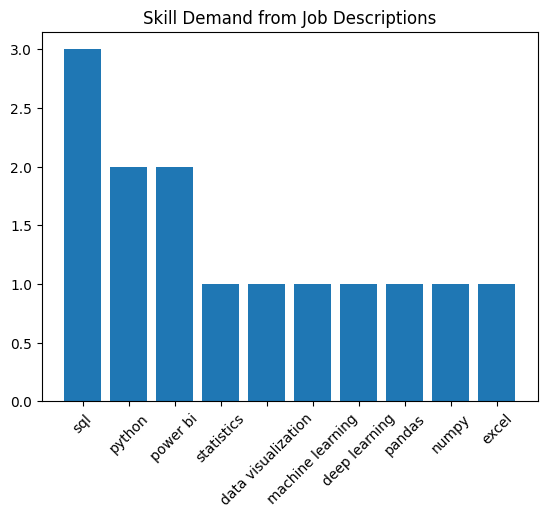

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(demand_df["Skill"], demand_df["Demand"])
plt.xticks(rotation=45)
plt.title("Skill Demand from Job Descriptions")
plt.show()

In [10]:
my_skills = ["python", "sql"]

missing_skills = get_missing_skills(
    market_skills=demand_df["Skill"].tolist(),
    user_skills=my_skills
)

missing_skills


['data visualization',
 'deep learning',
 'excel',
 'machine learning',
 'numpy',
 'pandas',
 'power bi',
 'statistics']